# Gradient Boosting

Gradient boosting trees works by growing trees sequentially. The models fits on the residual errors of the previous model to update residuals. 


# Training Process

The model starts with an initial base model which makes a prediction for each observation. The subsequent model then makes improvements by differentiating the residuals of the previous tree and scaling them with a learning rate. This process continues until all predictors are trained. The ensemble then makes predictions by classifying the class that receives the most weighted votes. 


# Gradient Boosting Hyperparameters

Since it’s an ensemble of decision trees it contains hyperparameters to control the growth of decision trees and ensembles.

- n_estimators: Number of trees. Can overfit if this is too large

- learning_rate: Shrinkage parameter. This controls the contribution of weak learners in the final contribution. Setting this at a value too low will require more trees but the model will generalize better. So, a low learning rate and high n_estimator works well.

- subsample: fraction of training instances to be used for training each tree. setting this at 0.25 means that each tree only uses 25% of the training instances selected randomly. This trades high bias for low variance. This is called stochastic gradient boosting.

- warm_start: early stopping callback parameter if the model does not improve well for 5 consecutive iterations.

- max_depth: Size of each tree

- max_leaf_nodes: 

- min_samples_split: Minimum number of samples to split


# Gradient Boosting pros and cons


**Pros**

- They provide feature importance scores


**Cons**

- Each model in the boosting sequence depends upon the previous tree in the series. This creates a bottleneck.



# 1. Libraries

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# Import Data
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 2. Preprocessing

In [6]:
# Create subsets of input features and response variable.
X = dataset.iloc[:, :-1].values
y = dataset['Purchased'].values

# Training and Testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 911)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('Standardized feature Mean:',  X_train.mean().round())
print('Standardized feature SD :',   X_train.std().round())

Standardized feature Mean: 0.0
Standardized feature SD : 1.0


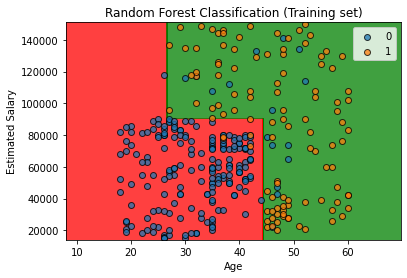

In [21]:
# Training the Random Forest Classification
gbc = GradientBoostingClassifier(n_estimators = 10, random_state = 0)
gbc.fit(X_train, y_train)

# Visualising the Training set results
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, gbc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i),edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75, label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# 3. Model Evaluation

In [10]:
# Predicting a new result using age 40 and salary 87000
print(gbc.predict(sc.transform([[40,87000]])))
gbc.predict_proba(sc.transform([[40,87000]]))

# Predicting the Test set results
y_pred = gbc.predict(X_test)

# Classification Accuracy
print('Classification Accuracy :', accuracy_score(y_test, y_pred))

[0]
Classification Accuracy : 0.8625


# 4. K-Fold Cross Validation

In [11]:
# Lets deploy 10 fold cross validation
accuracies = cross_val_score(estimator = gbc,
                             X = X,
                             y = y,
                             cv = 10,
                             scoring = 'accuracy')

print(accuracies)
print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f} %".format(accuracies.std()*100))

[0.975 0.65  0.9   0.975 1.    0.85  0.825 0.775 0.875 0.975]
0.8800000000000001
Accuracy: 88.000 %
Standard Deviation: 10.476 %


# 5. Hyperparametric Tuning

In [15]:
# Grid Search CV
param_grid = [{'max_depth':    [2, 3, 5, 10, 20, 50],
              'n_estimators':  [3,5, 10, 15],
              'learning_rate': [0.25, 0.5, 0.75]}]

# Instantiate GBC
gbc = GradientBoostingClassifier()

# Configure GridSearchCV
grid_search = GridSearchCV(gbc, param_grid, cv=5,
                                  scoring="accuracy",
                                  n_jobs=-1)

# Initiate Search
grid_search.fit(X_train, y_train)


# Extract Tuned Parameters and Predictive Accuracy
tuned_params = random_search.best_params_
tuned_score = random_search.best_score_
best_estimator = random_search.best_estimator_

# Print Results
print("Best Accuracy: {:.2f} %".format(grid_search.best_score_*100))
print("Best Parameters:", tuned_params)

 Tuned Random Forest Accuracy: 
 0.925

 GradientBoostingClassifier(learning_rate=0.25, max_depth=2, n_estimators=5)


({'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 5}, None, None)

In [17]:
# Randomized Search

param_space = {'max_depth':    [2, 3, 5, 10, 20, 50],
              'n_estimators':  [3,5, 10, 15],
              'learning_rate': [0.25, 0.5, 0.75]}

# Configure Randomized Search
random_search = RandomizedSearchCV(gbc, param_space, n_iter=32,
                                        scoring="accuracy", cv=5,
                                        n_jobs=-1, random_state=911)

# Initiate Search
random_search.fit(X_train, y_train)

# Extract Tuned Parameters and Predictive Accuracy
tuned_params = random_search.best_params_
tuned_score = random_search.best_score_
best_estimator = random_search.best_estimator_

# Print Results
print("Best Accuracy: {:.2f} %".format(random_search.best_score_*100))
print("Best Parameters:", tuned_params)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=32,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.5, 0.75],
                                        'max_depth': [2, 3, 5, 10, 20, 50],
                                        'n_estimators': [3, 5, 10, 15]},
                   random_state=911, scoring='accuracy')

# 6. Evaluation Metrics

In [19]:
# Confusion Matrix

def evaluate_model(gbc, X_test):
    
    y_pred = gbc.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.6, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)
    
    
    # ROC/AUC Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, c = 'green',
                linewidth = 3,
                alpha = 0.75)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()
    
    
    # Visualising the Testing Results
    X_set, y_set = sc.inverse_transform(X_test), y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                         np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
    plt.contourf(X1, X2, gbc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], cmap = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

In [20]:
evaluate_model(gbc, X_test)

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.